In [1]:
import datasets
import re

In [2]:

def document_iter(text_list):
    bads = (
            re.compile(r'<!--\s*\n\s*/\*\s*Font Definitions\s*\*/'),
            re.compile(r'\uFFFD'),
            re.compile(r'endstream.*?(?=\n|$)'),
            re.compile(r'/Author \(user\)\n|/Creator'),
            re.compile(r'\ue51d'),
            re.compile(r'[\u0080-\u00FF\u0100-\u017F]'), #weird latin dialects like ã
           )
            

    
    for i,text in enumerate(text_list):
        if not text:
            continue
        text=text.strip()
        
        if text in ("File not found",""):
            continue
            
        skip=False
        for b in bads:
            if b.search(text):
                skip=True
                break
        if skip:
            continue

        yield (i,re.sub(r'\n\s*\n\s*\n+', '\n\n', text))

In [3]:
data = datasets.load_dataset('LevMuchnik/SupremeCourtOfIsrael')

In [4]:
l=list(document_iter(data["train"]["text"]))

In [5]:
l[1000]

(1029,
 'בית המשפט העליון\n\nבה"נ  97 /\n2582\n\nבפני נשיא בית המשפט העליון\n\nבדיון\nלפי חוק שיפוט בענייני התרת נישואין\n\n(מקרים\nמיוחדים), התשכ"ט1969-\n\nהמבק\nשת\n:                                         ברינדין\nגרה\n\n                   נגד\n\nהמשיבים\n:                                         \n1.\nברינדין דמיטרי\n\n                                                      2.\nהיועץ המשפטי לממשלה\n\nבשם\nהמבקשת:                                  עו"ד סוניה טראוב\n\nבשם\nהיועץ המשפטי לממשלה:               עו"ד זיוה שמחה\n\nהחלטה בדבר קביעת שיפוט בענייני\nהתרת נישואין\n\n             הנני קובע בתוקף סמכותי לפי סעיף 1(א) לחוק\nשיפוט בענייני התרת נישואין (מקרים מיוחדים), התשכ"ט1969-, כי לבית המשפט\nלענייני משפחה בחיפה יהיה שיפוט בעניין התרת הנישואין של בני הזוג ברינדין. \n\n             ניתנה היום, כ"ט באייר התשנ"ז\n(5.6.97). \n\n                                                      ה נ\nש י א\n\nהעתק מתאים למקור\n\nשמריהו\nכהן - מזכיר ראשי\n\n97025820.\nA02\n/דז/')

In [6]:
import tiktoken

In [7]:
#https://github.com/openai/tiktoken
enc = tiktoken.encoding_for_model("gpt-4")

In [8]:
enc.decode(enc.encode(l[1000][1]))

'בית המשפט העליון\n\nבה"נ  97 /\n2582\n\nבפני נשיא בית המשפט העליון\n\nבדיון\nלפי חוק שיפוט בענייני התרת נישואין\n\n(מקרים\nמיוחדים), התשכ"ט1969-\n\nהמבק\nשת\n:                                         ברינדין\nגרה\n\n                   נגד\n\nהמשיבים\n:                                         \n1.\nברינדין דמיטרי\n\n                                                      2.\nהיועץ המשפטי לממשלה\n\nבשם\nהמבקשת:                                  עו"ד סוניה טראוב\n\nבשם\nהיועץ המשפטי לממשלה:               עו"ד זיוה שמחה\n\nהחלטה בדבר קביעת שיפוט בענייני\nהתרת נישואין\n\n             הנני קובע בתוקף סמכותי לפי סעיף 1(א) לחוק\nשיפוט בענייני התרת נישואין (מקרים מיוחדים), התשכ"ט1969-, כי לבית המשפט\nלענייני משפחה בחיפה יהיה שיפוט בעניין התרת הנישואין של בני הזוג ברינדין. \n\n             ניתנה היום, כ"ט באייר התשנ"ז\n(5.6.97). \n\n                                                      ה נ\nש י א\n\nהעתק מתאים למקור\n\nשמריהו\nכהן - מזכיר ראשי\n\n97025820.\nA02\n/דז/'

In [9]:
len(enc.encode(l[1000][1]))

597

In [10]:
from tqdm.notebook import tqdm

In [11]:
lens=[len(enc.encode(x[1])) for x in tqdm(l)]
max(lens)

  0%|          | 0/691512 [00:00<?, ?it/s]

418912

In [12]:
small=len([x for x in lens if x<=10_000])
small/len(lens)

0.9789099827624105

In [14]:
import pandas as pd

array([[<Axes: title={'center': '0'}>]], dtype=object)

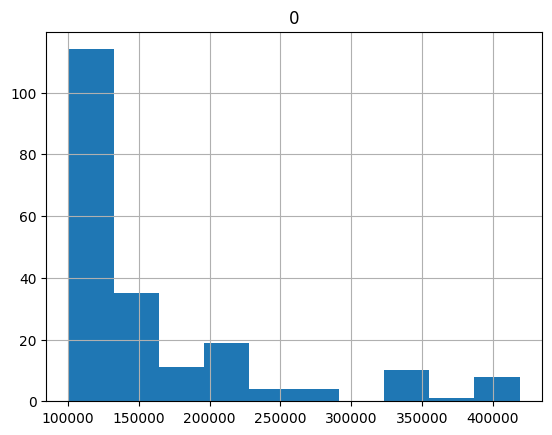

In [15]:
pd.DataFrame([x for x in lens if x>100_000]).hist()

In [16]:
df=pd.DataFrame(lens)
df

,0
0,2620
1,427
2,526
3,359
4,534
...,...
691507,521
691508,532
691509,724
691510,541


In [17]:
df[0].apply(lambda x:x>100_000).sum()

206

In [18]:
exmple=l[df[df[0].apply(lambda x:x>100_000)].index[0]][1]
len(enc.encode(exmple))

102027

In [19]:
exmple

'ב\nבית המשפט העליון\n בשבתו כבית משפט \nלערעורים אזרחיים\n\nע"א \n6024/97\n\nבפני:                                               \nכבוד הנשיא א\' ברק\n\n                                                      כבוד\nהשופט מ\' חשין\n\n                                                      כבוד\nהשופט י\' אנגלרד\n\nהמערער\nת:                                       \nפרדריקה שביט\n\n                   נגד\n\nהמשיב\n:                                           \nחברה קדישא גחש"א ראשל"צ\n\nתאריך הישיבה:                                 ט"ו\nבאלול התשנ"ח (6.9.98)\n\nבשם\n\nהמערער\nת:                                עו"ד\nגלי בר-אל, עו"ד הרב אורי רגב\n\nבשם\n\nהמשיב\n:                                     עו"ד\nיאיר שילה\n\nפסק-דין\n\nהשופט מ\' חשין:\n\n             מצֵבה בבית קברות. מה ייחרט עליה? מה יירשם\nעליה? מי יחליט על כך? את הקבר תפקוד המשפחה, יפקדו החברים, לא איש זולתם. הם\nשיזכרו, הם שיבואו, הם שיבכו, הם שיכאבו. האם יהיו אלה הם שיחליטו כיצד יזכרו את\nהמת או שמא יחליט על-כך איש זולתם - למשל,

In [20]:
subset=df[df[0].apply(lambda x:10_000<x<100_000)]
subset.size

14378

In [25]:
subset=df[df[0].apply(lambda x:1_000<x<10_000)]
subset.size

166102

In [28]:
print(l[subset.index[0]][1])

ע"א
2512/93

בפני:                                               כבוד
המשנה לנשיא ש. לוין

                                                      כבוד
השופט י' קדמי                                

                                                      כבוד
השופטת ד' דורנר

המערערת:                                       איתורית
שירותי תקשורת בע"מ      

                                                      נ  
ג  ד

המשיבה:                                          מדינת
ישראל                     

ערעור על פסק-דין בית המשפט המחוזי

             בתל-אביב-יפו מיום 18.3.93 בתיק 

ה"פ 652/90 שניתן על ידי כבוד השופט

                                                      א'
גורן

תאריך
הישיבה:                                 כט' בטבת התשנ"ז (8.1.97)

בשם
המערערת:                                עו"ד א' דורות

בשם
המשיבה:                                  עו"ד  א' אלף

פסק-דין

השופט י' קדמי
:

1.           זהו ערעור על החלטתו של בית המשפט המחוזי
בתל-אביב-יפו בה"פ 652/96, לפיה נדחתה בקשתה של המער

In [22]:
from openai import OpenAI

In [23]:
client = OpenAI()

In [24]:
completion = client.chat.completions.create(
  #model="gpt-4-32k",
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": "You will be provided with a document Your task is to formulate an insightful question that can be uniquely answered by this text."},
    {"role": "user", "content": l[subset.index[0]][1]},
      {"role": "system", "content": "remember you have to formulate a question"},
  ]
)

print(completion.choices[0].message)

ChatCompletionMessage(content="What are the reasons cited by the Israeli Supreme Court for rejecting Yoram Yazdi's petition against the State Attorney and the prosecutor from the Jerusalem District Attorney's Office, Elad Rosenthal, in case number HCJ 5856/03?", role='assistant', function_call=None)


In [ ]:
completion = client.chat.completions.create(
  #model="gpt-4-32k",
  model="gpt-4-1106-preview",
  messages=[
    {"role": "system", "content": "You will be provided with a document Your task is to formulate an insightful question that can be uniquely answered by this text."},
    {"role": "user", "content": l[subset.index[0]][1]},
      {"role": "system", "content": "in your question avoid mensioning "},
  ]
)

print(completion.choices[0].message)

In [27]:
df[0].apply(lambda x:800<=x<=1_000).mean()

0.0806204375339835

In [28]:
df[0].apply(lambda x:800<=x<=1_000).sum()

55750

In [44]:
subset=df[df[0].apply(lambda x:1100<=x<=2_000)]
subset[0].argmin()

188

In [45]:
l[subset[0].argmin()][1]

'בית המשפט העליון\n\nרע"פ 3556/97\n\nבפני:                                               \nכבוד המשנה לנשיא ש\' לוין\n\nהמבקש\n:                                           \nדיב\nנביל\n\n                   נגד\n\nהמשיב\nה\n:                                          \nמדינת ישראל\n\n                                                      בקשת\nרשות ערעור על החלטת בית המשפט\n\n                                                      המחוזי\nבנצרת בב"ש 1452/97 שניתן ביום\n\n                                                      8.6.97\nעל ידי כבוד השופט גינת.\n\nבשם\nהמבקש:                                    עו"ד א\' לפידות\n\nהחלטה\n\n             לתשובת המדינה תוך 7 ימים.\n\n             ניתנה היום, ה\' בסיון תשנ"ז (10.6.97).\n\nהמשנה לנשיא\n\nהעתק\nמתאים למקור\n\nשמריהו\nכהן - מזכיר ראשי\n\n97035560.\nB01'